In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfield_players = pd.read_csv('outfield_players.csv')

In [3]:
outfield_players

,UID,Name,Age,Position(s),Foot,Height (CM),Weight (KG),International Caps,International Goals,Club,...,PA,Corners,Crossing,Dribbling,Finishing,Heading,Long Shots,Long Throws,Marking,Tackling
0,2000227963,Markel Mancisidor,16,"DR, DC",Right,176.0,NaN,NaN,NaN,Salford,...,53.0,5.0,5.0,6.0,4.0,5.0,5.0,1.0,11.0,7.0
1,7458500,Lionel Messi,35,"AMR, AMC, ST",Left,169.0,67.0,162.0,86.0,Paris Saint-Germain,...,99.0,15.0,15.0,20.0,17.0,10.0,16.0,4.0,4.0,7.0
2,85139014,Kylian Mbappé,23,"AMR, AML, ST",Right,178.0,73.0,57.0,27.0,Paris Saint-Germain,...,99.0,13.0,13.0,18.0,17.0,7.0,13.0,4.0,4.0,4.0
3,735216,Cristiano Ronaldo,37,ST,Right,187.0,84.0,189.0,117.0,Al-Nassr (KSA),...,98.0,10.0,11.0,12.0,18.0,18.0,15.0,5.0,3.0,2.0
4,29179241,Erling Haaland,21,ST,Left,195.0,88.0,21.0,20.0,Manchester City,...,98.0,7.0,10.0,14.0,18.0,15.0,13.0,5.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970,67199254,Juan Cifré,29,"DR, WBR",Right,174.0,67.0,NaN,NaN,Poblense,...,48.0,5.0,10.0,4.0,3.0,8.0,6.0,6.0,8.0,14.0
13971,67202355,Iván Martín,27,ST,Right,183.0,76.0,NaN,NaN,Pistoiese,...,48.0,5.0,8.0,11.0,11.0,10.0,8.0,4.0,5.0,6.0
13972,67211477,Jorge Gómez,26,"MR, ML, AMR, AML",Left,179.0,70.0,NaN,NaN,Tenisca,...,48.0,6.0,11.0,13.0,11.0,5.0,10.0,4.0,5.0,5.0
13973,67216734,Iago Novo,23,"AMC, ST",Right,180.0,NaN,NaN,NaN,Lugo,...,53.0,5.0,6.0,10.0,13.0,7.0,6.0,1.0,6.0,1.0


In [4]:
outfield_players = outfield_players.dropna(subset=['Sell value (€)'])

In [5]:
outfield_players = outfield_players.query('`Position(s)` != "GK"').dropna(how='all', axis='columns')

In [6]:
[np.log(x) for x in outfield_players['Sell value (€)'] if x > 0]

[np.float64(18.530425335490378),
 np.float64(14.936793905063237),
 np.float64(16.37821663191502),
 np.float64(18.162725614945412),
 np.float64(19.110746933128997),
 np.float64(17.014548914929367),
 np.float64(13.67192882948625),
 np.float64(18.550956618122555),
 np.float64(17.117513191312646),
 np.float64(15.709625030820327),
 np.float64(18.98549704290116),
 np.float64(18.638109275607462),
 np.float64(18.47572161738529),
 np.float64(17.790937190781634),
 np.float64(17.53103023903097),
 np.float64(17.45896368386342),
 np.float64(18.12673938967052),
 np.float64(13.292578614203236),
 np.float64(18.494062981395775),
 np.float64(17.711334870117472),
 np.float64(18.367465498536458),
 np.float64(14.4646431531048),
 np.float64(13.483681524969649),
 np.float64(17.516850309140985),
 np.float64(15.454794609995364),
 np.float64(16.645026486762106),
 np.float64(17.821681795669832),
 np.float64(18.436296185837687),
 np.float64(19.004904179196238),
 np.float64(17.204816516071187),
 np.float64(17.3458

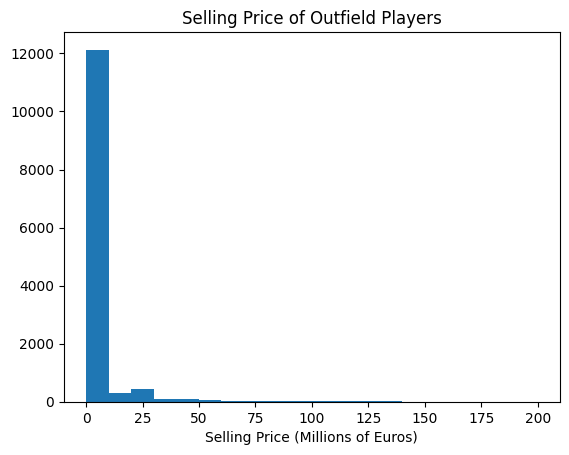

In [7]:
plt.hist(outfield_players['Sell value (€)'] / 1e6, bins=20)
plt.xlabel('Selling Price (Millions of Euros)')
plt.title('Selling Price of Outfield Players')
plt.savefig('proposal/value_histogram.png')

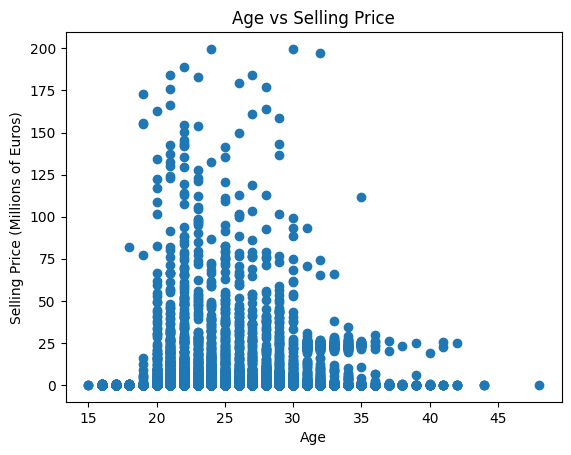

In [8]:
plt.scatter(outfield_players['Age'], outfield_players['Sell value (€)'] / 1e6)
plt.xlabel('Age')
plt.ylabel('Selling Price (Millions of Euros)')
plt.title('Age vs Selling Price')
plt.savefig('proposal/age_vs_sale_price.png')

Text(0, 0.5, 'Selling Price (Millions of Euros)')

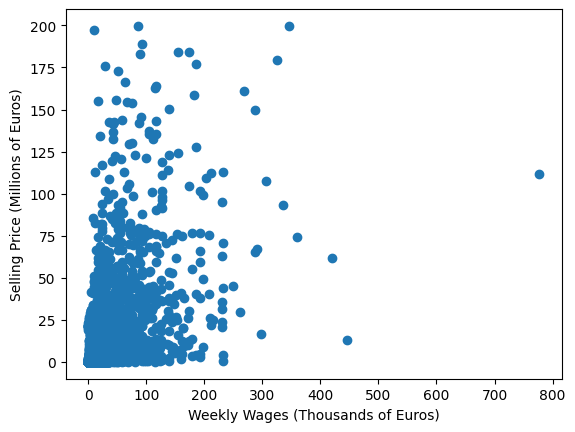

In [9]:
plt.scatter(outfield_players['Wages (€)'] / 1e3, outfield_players['Sell value (€)'] / 1e6)
plt.xlabel('Weekly Wages (Thousands of Euros)')
plt.ylabel('Selling Price (Millions of Euros)')

In [10]:
ca_vs_value = outfield_players.groupby('CA')['Sell value (€)'].mean() / 1e6

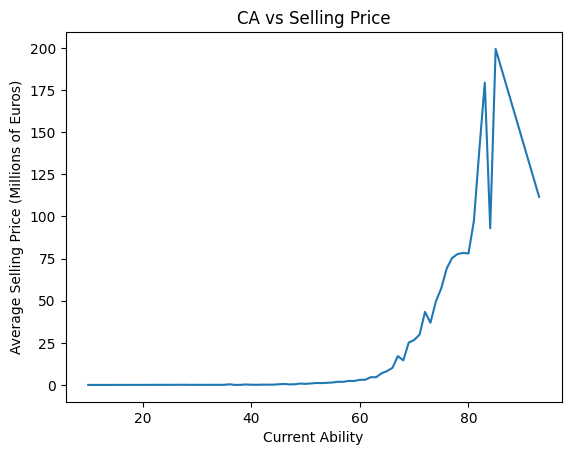

In [11]:
# plt.scatter(outfield_players['CA'], outfield_players['Sell value (€)'] / 1e6)
plt.plot(ca_vs_value.index, ca_vs_value)
plt.xlabel('Current Ability')
plt.ylabel('Average Selling Price (Millions of Euros)')
plt.title('CA vs Selling Price')
plt.savefig('proposal/ca_vs_selling_price.png')

In [ ]:
plt.hist(outfield_players['CA'], bins=20)